In [1]:
import Gadget as G
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.mlab import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy           as np
import math            as mt
import statistics      as st
import snap_blocks     as sb
import plots           as im
import plot_format     as pf
import global_fuctions as gf

In [2]:
pf.plot_format()

In [3]:
#declaration of paths
path_main = '/home/meugenia/Documentos/discos/'
path_snap = path_main+'snaps/'
path_save = path_main +'plots/'

snap = 'snapshot_000'
ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)
r=(x_s*x_s+y_s*y_s)**0.5

In [43]:
typep   = 'rho'
limx    = [-9,9]
limy    = [-1,1]
limz    = [-3,3]
limrho  = [1e-7,10**(-0.26)]
liminte = [-2.15,1]
limvrms = [-3,0]
limr    = [0,9]

sgvar = [x_s , y_s , z_s , r , rho_s]

varlimiters = [3,1,2,4]
limits =[limr,limy,limz,limrho]

for i in range(len(varlimiters)):
    print limits[i]
    if i==0:
        _sgvar=gf.sobgroup(sgvar,varlimiters[i],limits[i])
    else:
        _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0]],varlimiters[i],limits[i])
    sgvar=_sgvar


[0, 9]
[-1, 1]
[-3, 3]
[1e-07, 0.5495408738576245]


In [44]:
sgx   =_sgvar[0][0]
sgy   =_sgvar[1][0]
sgz   =_sgvar[2][0]
sgr   =_sgvar[3][0]
sgrho =_sgvar[4][0]

In [48]:
_sgvar[4][0].min(),_sgvar[4][0].max()

(2.7470145e-07, 0.11548974)

In [47]:
sindex=["000","005", "010","050","100","110","120","130","140","150","160","170","180","190","200","250","300","350"]


for sn in range(len(sindex)):
    if sn!=0:
        continue
    snap = 'snapshot_'+sindex[sn]
    print snap
    #ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
    #ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
    #sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)

    if typep=='rho':
        #prop  = np.log10(sgrho)
        #limpr = limrho
        paths = path_save+'IMSHOW_RHO/niveles/'
        textbar = r"$log$ $\rho/(M_{\odot}/kpc^{3})$"
    elif typep=='u':
        #prop  = np.log10(eint_s)
        #limpr = liminte
        paths = path_save+'IMSHOW_EINT/niveles/'
        textbar = r"$log$  $U/(km/s)^{2}$"
    elif typep=='vrms':
        #prop  = np.log10(vrms_s)
        #limpr = limvrms        
        paths = path_save+'IMSHOW_VRMS/niveles/'
        textbar = r"$log$ $VRMS/(km/s)$"
    elif typep=='b':
        #prop  = bz_s
        #limpr = [bz_s.min(),bz_s.max()]        
        paths =path_save+'IMSHOW_BZ/niveles/'
        textbar = "Bz"
        
    im.plots_IMSHOW_cc(snap,sgx,sgz,np.log10(sgrho),limx,limz,np.log10(limrho),1000,10,textbar,paths,'yslice')
    
    print 'save'

snapshot_000
save


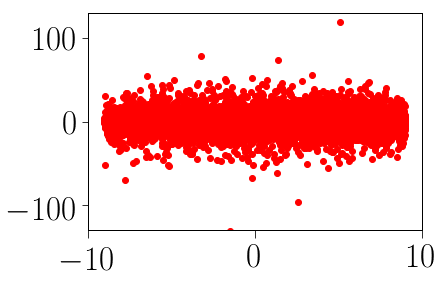

In [25]:
#testing subgroup
lala=gf.sobgroup([x_s,y_s,z_s,r],3,limr)
plt.scatter(lala[0],lala[2],color='r')
plt.ylim(-130,130)
plt.xlim(-10,10)
plt.show()

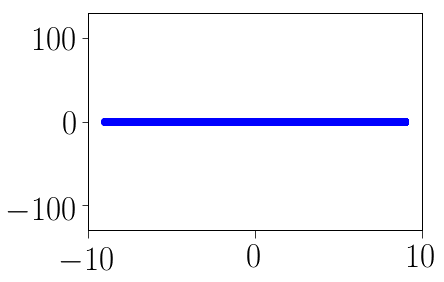

In [26]:
lala=gf.sobgroup(lala,2,limz)
plt.scatter(lala[0],lala[2],color='b')
plt.xlim(-10,10)
plt.ylim(-130,130)
plt.show()

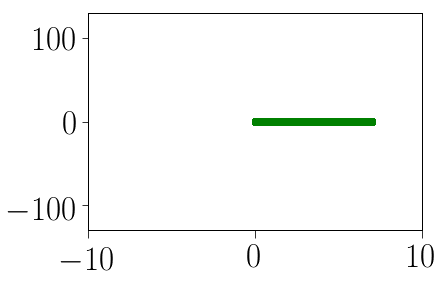

In [27]:
lala=gf.sobgroup(lala,0,limx)
plt.scatter(lala[0],lala[2],color='g')
plt.xlim(-10,10)
plt.ylim(-130,130)
plt.show()

In [20]:
lala2=gf.sobgroup(lala,2,limz)
lala3=gf.sobgroup(lala2,0,limx)
lala=gf.sobgroup(lala,2,limz)

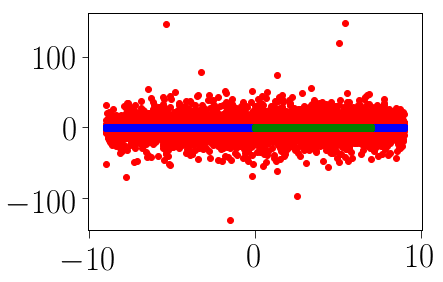

In [21]:
plt.scatter(lala1[0],lala1[2],color='r')
plt.scatter(lala2[0],lala2[2],color='b')
plt.scatter(lala3[0],lala3[2],color='g')
plt.show()

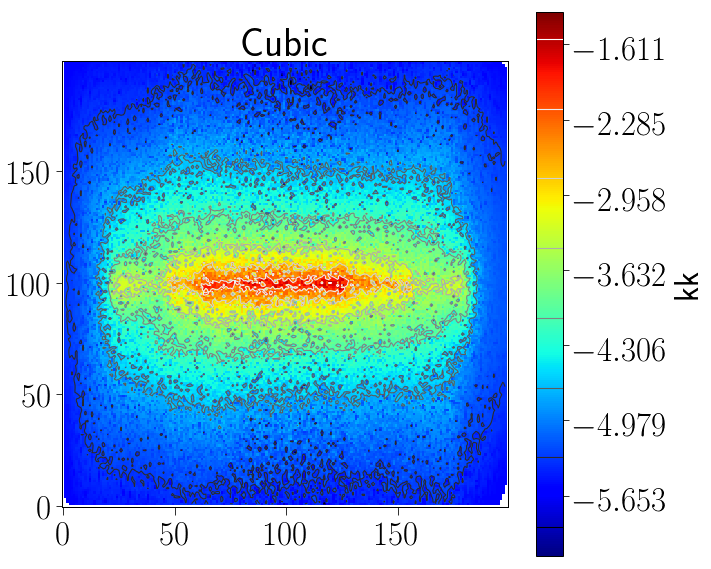

In [42]:
#por si griddata deja de funcionar
from scipy.interpolate import griddata
points = (sgx,sgz)
values = np.log10(sgrho)
grid_x, grid_y = np.mgrid[limx[0]:limx[1]:200j, limz[0]:limz[1]:200j]
#grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='linear')
kk=plt.imshow(grid_z2.T, origin='lower',cmap='jet')
con = plt.contour(grid_z2.T,levels=np.linspace(values.min(),values.max(),10),cmap='Greys_r',linewidths=1.1)
cbar = plt.colorbar(kk, label='kk',ticks=np.linspace(-7,values.max(),10))
cbar.add_lines(con)    
plt.title('Cubic')
plt.gcf().set_size_inches(10, 10)
plt.show()